In [ ]:
# Explanation of Key Parts:
# 1.Data Preprocessing:
#   The preprocess() function now handles datetime columns (transaction_date) by extracting year, month, and day as separate features, and then dropping the original transaction_date column.
#   Categorical columns are handled by one-hot encoding using pd.get_dummies().
#   Any missing values are imputed using the median of the columns.

# 2.Model Training and Evaluation:
#  We train two models, SVM and KNN, and evaluate their performance using accuracy, classification report, and confusion matrix.
#  A train_and_evaluate() function handles the training and evaluation steps.

# 3.Hyperparameter Tuning:
#  We use GridSearchCV for hyperparameter tuning to find the best set of parameters for both SVM and KNN.
#  We tune the C parameter and kernel for SVM, and n_neighbors and weights for KNN.

# 4.Model Selection:
#  After evaluating both models, we choose the one with the higher accuracy.

#5. Confusion Matrix Visualization:
# We plot the confusion matrices for both models using seaborn.heatmap.

# 6.Model Selection Summary:
# At the end, we select the model that performs better based on accuracy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Load the data
train_data = pd.read_excel('train_data.xlsx')
test_data = pd.read_excel('test_data.xlsx')

In [ ]:
# EDA Section

In [4]:
# Data Overview
print("Data Overview")
print(train_data.info())
print(train_data.describe())

Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  

In [5]:
# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


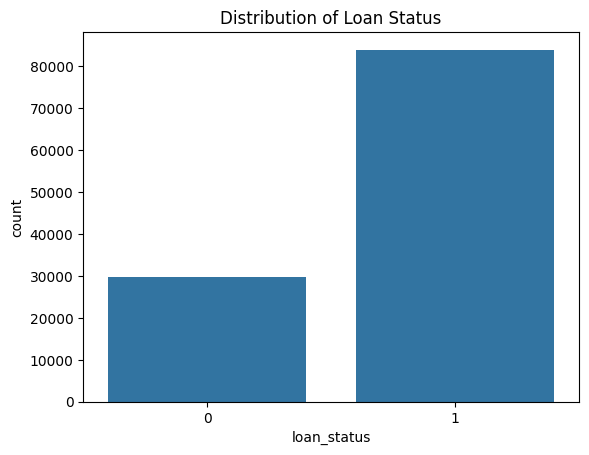

In [6]:
# Data visualization: Distribution of target variable
sns.countplot(x='loan_status', data=train_data)
plt.title("Distribution of Loan Status")
plt.show()

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numeric features for correlation calculation
numeric_data = train_data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

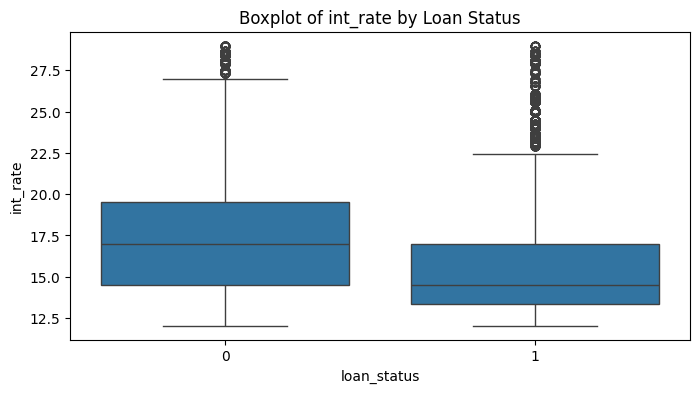

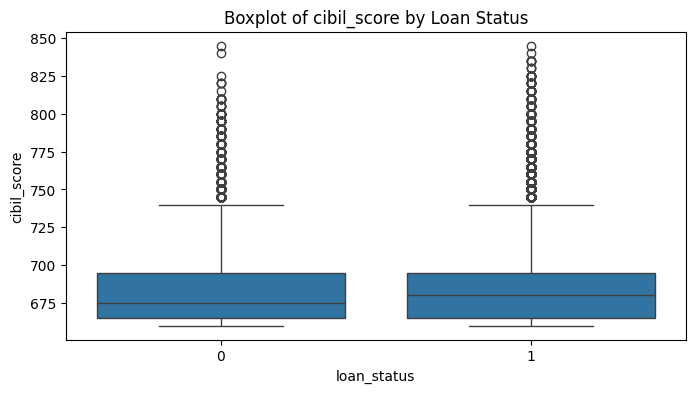

In [9]:
# Boxplot for numeric features vs target
num_features = ['loan_amnt', 'annual_inc', 'int_rate', 'account_bal', 'cibil_score']
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='loan_status', y=feature, data=train_data)
    plt.title(f"Boxplot of {feature} by Loan Status")
    plt.show()

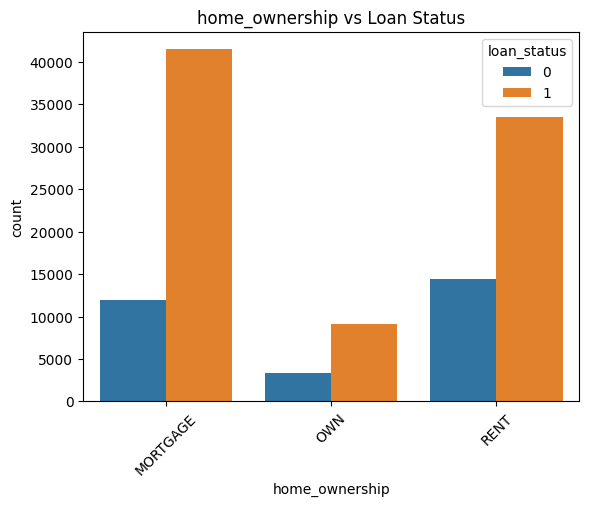

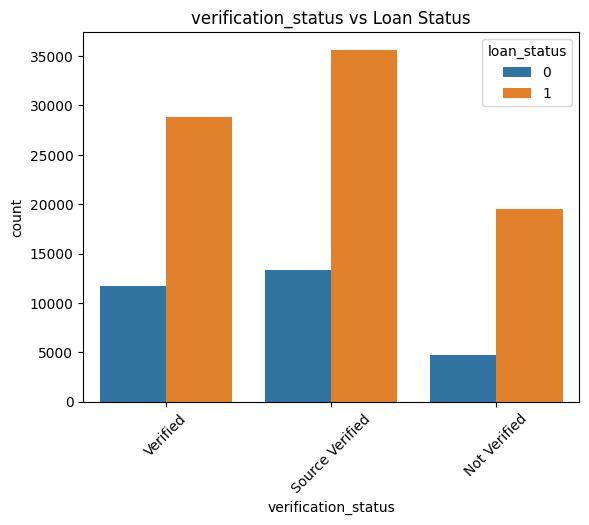

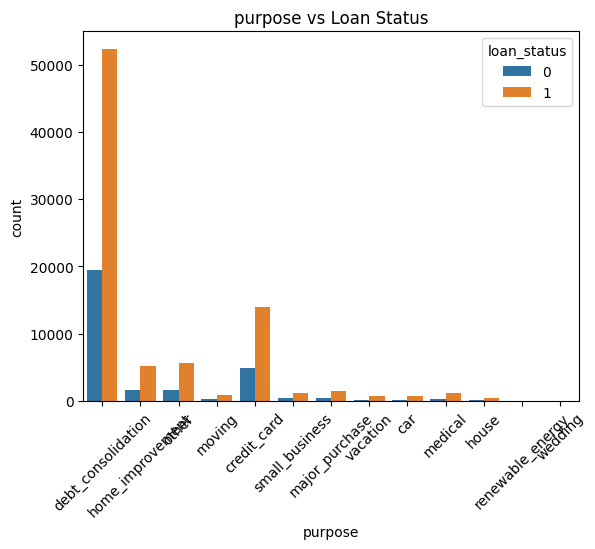

In [10]:
# Categorical data distribution
cat_features = ['home_ownership', 'verification_status', 'purpose']
for feature in cat_features:
    sns.countplot(x=feature, hue='loan_status', data=train_data)
    plt.title(f"{feature} vs Loan Status")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#Preprocessing Section

In [11]:
def preprocess_data(data):
    # Handle missing values
    data.fillna(data.median(numeric_only=True), inplace=True)
    data.fillna("Unknown", inplace=True)

    # Encode categorical variables
    label_enc = LabelEncoder()
    for col in ['home_ownership', 'verification_status', 'purpose']:
        data[col] = label_enc.fit_transform(data[col])

    # Feature scaling
    scaler = StandardScaler()
    data[['loan_amnt', 'annual_inc', 'int_rate', 'account_bal', 'cibil_score']] = scaler.fit_transform(
        data[['loan_amnt', 'annual_inc', 'int_rate', 'account_bal', 'cibil_score']]
    )

    return data

In [12]:
# Preprocess train and test data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)


In [13]:
# Split data into features and target
X = train_data.drop(['loan_status', 'customer_id', 'transaction_date'], axis=1)
y = train_data['loan_status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Modeling Section

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
def load_data(file_path):
    data = pd.read_excel("/content/test_data.xlsx")
    return data


In [31]:
def preprocess(data):
    """Preprocess the data: handle datetime, encoding, scaling, etc."""
    # Convert 'transaction_date' to datetime and extract features
    if 'transaction_date' in data.columns:
        data['transaction_date'] = pd.to_datetime(data['transaction_date'])
        data['year'] = data['transaction_date'].dt.year
        data['month'] = data['transaction_date'].dt.month
        data['day'] = data['transaction_date'].dt.day
        data.drop('transaction_date', axis=1, inplace=True)
    data = pd.get_dummies(data, drop_first=True)

    data = data.apply(pd.to_numeric, errors='coerce')

    # Handle missing values
    data.fillna(data.median(), inplace=True)

    # Split into features (X) and target (y)
    X = data.drop('loan_status', axis=1)  # All columns except 'loan_status'
    y = data['loan_status']  # Target variable

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

In [32]:
# Define function to train models and evaluate performance
def train_and_evaluate(X_train, y_train, X_test, y_test, model_type='svm'):
    if model_type == 'svm':
        model = SVC(kernel='linear')  # Linear kernel SVM
    elif model_type == 'knn':
        model = KNeighborsClassifier(n_neighbors=5)  # Default KNN with 5 neighbors
    else:
        raise ValueError("Model type must be 'svm' or 'knn'")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    return accuracy, classification_rep, confusion_mat


In [33]:
def hyperparameter_tuning(X_train, y_train, model_type='svm'):
    """Perform hyperparameter tuning for SVM and KNN using GridSearchCV."""
    if model_type == 'svm':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    elif model_type == 'knn':
        param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
        grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    else:
        raise ValueError("Model type must be 'svm' or 'knn'")

    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_


In [34]:
# Load the dataset
train_data = load_data('train_data.xlsx')  # Make sure the path is correct
X, y = preprocess(train_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate models
accuracy_svm, report_svm, conf_mat_svm = train_and_evaluate(X_train, y_train, X_test, y_test, model_type='svm')
accuracy_knn, report_knn, conf_mat_knn = train_and_evaluate(X_train, y_train, X_test, y_test, model_type='knn')

In [35]:
print("SVM Model Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)
print("SVM Confusion Matrix:\n", conf_mat_svm)

SVM Model Accuracy: 0.6401261332282223
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.24      0.33       941
           1       0.66      0.88      0.75      1596

    accuracy                           0.64      2537
   macro avg       0.60      0.56      0.54      2537
weighted avg       0.61      0.64      0.60      2537

SVM Confusion Matrix:
 [[ 223  718]
 [ 195 1401]]


In [36]:
print("KNN Model Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", report_knn)
print("KNN Confusion Matrix:\n", conf_mat_knn)

KNN Model Accuracy: 0.6212061489948758
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.35      0.40       941
           1       0.67      0.78      0.72      1596

    accuracy                           0.62      2537
   macro avg       0.58      0.57      0.56      2537
weighted avg       0.60      0.62      0.60      2537

KNN Confusion Matrix:
 [[ 327  614]
 [ 347 1249]]


In [37]:
best_params_svm, best_score_svm = hyperparameter_tuning(X_train, y_train, model_type='svm')
best_params_knn, best_score_knn = hyperparameter_tuning(X_train, y_train, model_type='knn')


In [38]:
print("Best Params for SVM:", best_params_svm)
print("Best Score for SVM:", best_score_svm)


Best Params for SVM: {'C': 1, 'kernel': 'rbf'}
Best Score for SVM: 0.6811454787416326


In [39]:
print("Best Params for KNN:", best_params_knn)
print("Best Score for KNN:", best_score_knn)


Best Params for KNN: {'n_neighbors': 9, 'weights': 'uniform'}
Best Score for KNN: 0.6500531173608097


Text(0.5, 1.0, 'SVM Confusion Matrix')

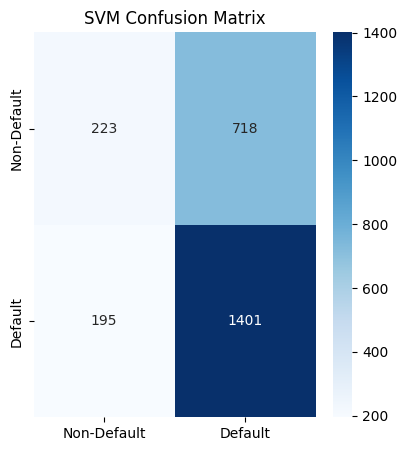

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_mat_svm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.title('SVM Confusion Matrix')

Text(0.5, 1.0, 'KNN Confusion Matrix')

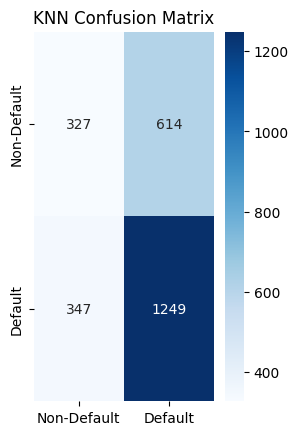

In [41]:
plt.subplot(1, 2, 2)
sns.heatmap(conf_mat_knn, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.title('KNN Confusion Matrix')


In [42]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [43]:
# Choose the best model based on the performance metrics
chosen_model = 'svm' if accuracy_svm > accuracy_knn else 'knn'
print(f"Chosen Model: {chosen_model}")

Chosen Model: svm
